#### Random Forest Classification

Random forest is an ensemble learning method that combines multiple decision tree classifiers to predict an outcome. The random forest algorithm predicts an outcome based on the predictions of the decision trees. It predicts by taking into account the average or mean of the output from various trees. 

<img src="https://i.imgur.com/SVfsmzp.png" width="600" height="400" />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [2]:
column_headers = ['Type','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color Intensity',
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']


df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=column_headers)
df.head(2)

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [3]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.94,0.78,1.00,1.00,2.00,3.00,3.00
Alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
Malic acid,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
Ash,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
Alcalinity of ash,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
Magnesium,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
Total phenols,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
Flavanoids,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
Nonflavanoid phenols,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58


In [4]:
X= df.drop('Type',axis=1)
y=df['Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Modelling

In [20]:
clf = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print("Accuracy on testing set: {:.2f}%".format(accuracy_score(y_pred,y_test)* 100))
print("Accuracy on training set: {:.2f}%".format(clf.score(X_train, y_train)* 100))

Accuracy on testing set: 95.56%
Accuracy on training set: 99.25%


Feature importance is a technique used to calculate a score for all the features for a given model. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

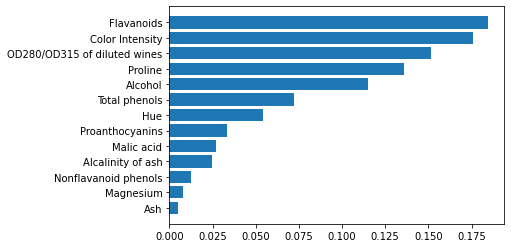

In [6]:
importances = clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [7]:
confusion_matrix(y_pred,y_test)

array([[16,  1,  0],
       [ 0, 19,  0],
       [ 0,  1,  8]])

In [8]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.90      1.00      0.95        19
           3       1.00      0.89      0.94         9

    accuracy                           0.96        45
   macro avg       0.97      0.94      0.95        45
weighted avg       0.96      0.96      0.96        45

